# Aula 3 - Seaborn

[Documentação Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

### Atividade

Resolver as questões abaixo. Em seguida, criar um repositório público no GitHub e armazenar no notebook criado, enviando somente o link do NOTEBOOK para o [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform).

Para resolver as questões abaixo utilizar o dataset 'tips' do seaborn.

*According to the tips dataset documentation, the Tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).[4] The waiter collected several variables: The **tip** in dollars, the **bill** in dollars, the **sex** of the bill payer, whether there were **smokers** in the party, the **day** of the week, the **time** of day and the **size** of the party.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Carrega o dataset tips e extrai informações gerais
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
# Visualiza os 3 primeiros registros do dataset
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
# Verifica as métricas estatísticas básicas
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Questão 1

Qual o valor médio da gorjeta (*tip*) de acordo com o dia da semana (*day*)?

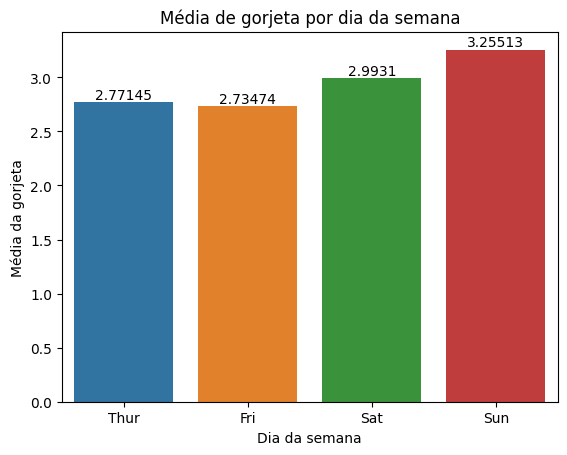

In [5]:
# Plota um gráfico de barras do valor médio das gorjetas por dia
fig, ax = plt.subplots()
sns.barplot(data=tips, x='day', y='tip', estimator='mean', errorbar=None)

# Títulos
plt.title('Média de gorjeta por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Média da gorjeta')

# Insere o valor de cada barra
ax.bar_label(ax.containers[0])

plt.show()

O maior valor médio da gorjeta é para aquelas dadas ao garçom aos domingos. De forma geral, em média, nos fins de semana, as gorjetas são maiores.

#### Questão 2

Qual a soma das gorjetas (*tip*) por turno do dia (*time*), observando os fumantes e não fumantes (*smoker*)?

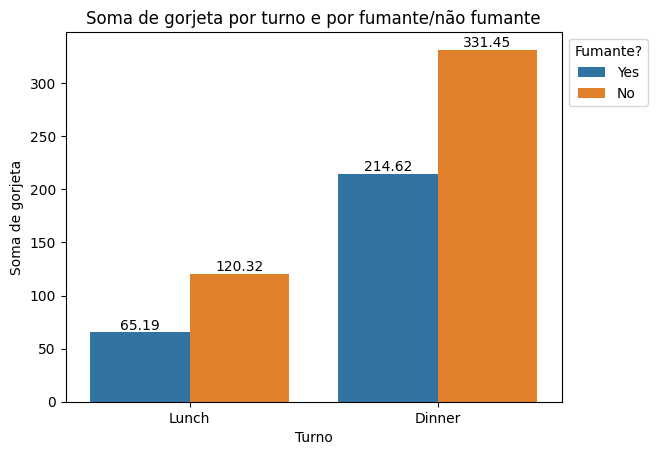

In [43]:
# Plota um gráfico de barras da soma das gorjetas por dia e por (não) fumante
fig, ax = plt.subplots()
sns.barplot(data=tips, x='time', y='tip', hue = 'smoker', estimator='sum', errorbar=None)

# Títulos
plt.title('Soma de gorjeta por turno e por fumante/não fumante')
plt.xlabel('Turno')
plt.ylabel('Soma de gorjeta')
plt.legend(title='Fumante?', loc='upper left', bbox_to_anchor=(1, 1))

# Insere o valor de cada barra para múltiplas agregações
for container in ax.containers:
    ax.bar_label(container)

plt.show()

Infere-se que o maior montante de gorjetas é dado no jantar, por não fumantes. No almoço, os não fumantes costumam dar gorjetas maiores que os fumantes. Isso pode ser explicado também por os fumantes serem minoria na sociedade.

#### Questão 3

Verique a distribuição de gorjetas (*tip*) por dia (*day*) e turno (*time*). Há algum dia e turno com maior presença de outliers?

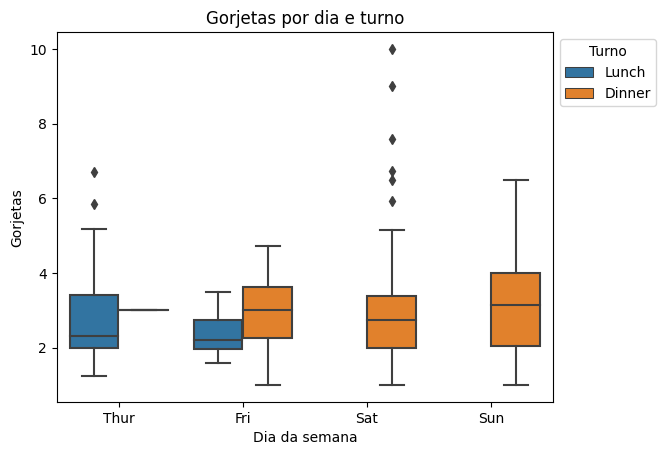

In [10]:
# Plota um gráfico de barras da soma das gorjetas por dia e por (não) fumante
sns.boxplot(data=tips, x='day', y='tip', hue = 'time')

# Títulos
plt.title('Gorjetas por dia e turno')
plt.xlabel('Dia da semana')
plt.ylabel('Gorjetas')
plt.legend(title='Turno', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

A mediana das distribuições das gorjetas pelos dias é parecida, mas verificamos a existência de outliers no sábado no jantar e na quinta no almoço (nessa ordem), quando foram dadas gorjetas mais altas que a mediana.

#### Questão 4

Qual a relação do valor total da conta com o valor da gorjeta?

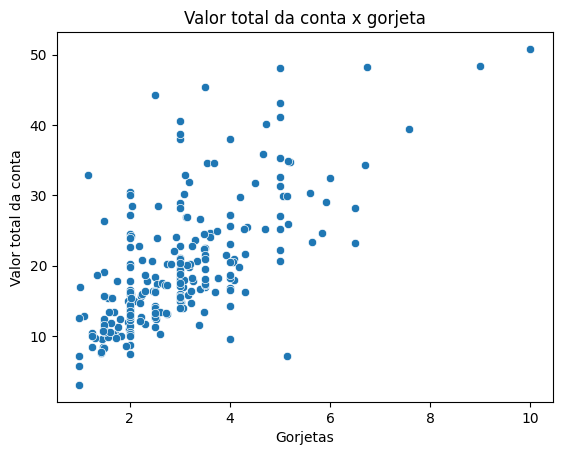

In [60]:
# Plota um gráfico de dispersão da relação entre o valor total da conta e o da gorjeta
sns.scatterplot(data=tips,
                x='tip',
                y='total_bill')

# Títulos
plt.title('Valor total da conta x gorjeta')
plt.xlabel('Gorjetas')
plt.ylabel('Valor total da conta')

plt.show()

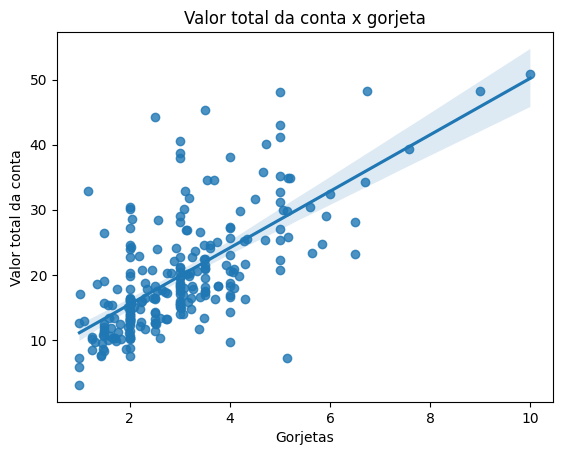

In [17]:
# Plota um gráfico de dispersão da relação entre o valor total da conta e o da gorjeta
# Adiciona uma reta que representa a regressão entre essas variáveis
sns.regplot(data=tips,
                x='tip',
                y='total_bill')

# Títulos
plt.title('Valor total da conta x gorjeta')
plt.xlabel('Gorjetas')
plt.ylabel('Valor total da conta')

plt.show()

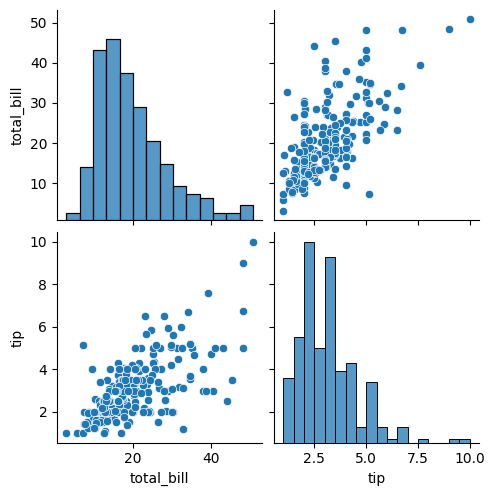

In [64]:
# Plota gráficos de distribuição e dispersão das duas variáveis
sns.pairplot(data = tips, vars = ('total_bill','tip'))

plt.show()

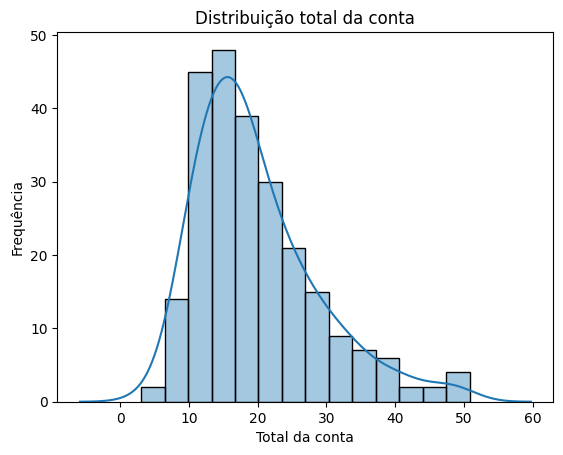

In [65]:
# Plota o histograma do total da conta com uma linha de continuidade
sns.histplot(tips.total_bill, alpha=0.4, kde=True, kde_kws={"cut": 3})

# Títulos
plt.title('Distribuição total da conta')
plt.xlabel('Total da conta')
plt.ylabel('Frequência')

plt.show()

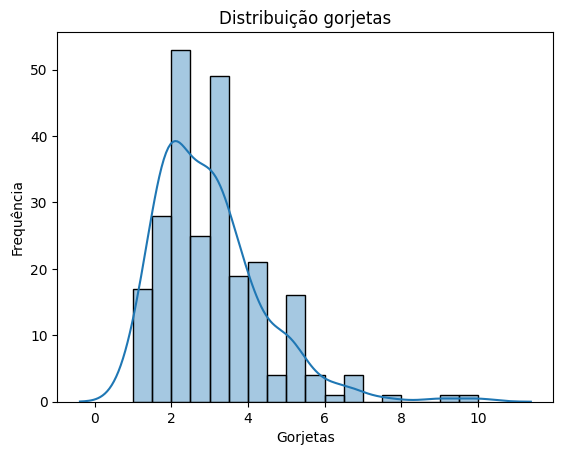

In [66]:
# Plota o histograma das gorjetas com uma linha de continuidade
sns.histplot(tips.tip, alpha=0.4, kde=True, kde_kws={"cut": 3})

# Títulos
plt.title('Distribuição gorjetas')
plt.xlabel('Gorjetas')
plt.ylabel('Frequência')

plt.show()

Existe uma correlação positiva entre o total da conta e as gorjetas dadas, de modo que ambas possuem distribuição semelhante.

#### Questão 5

Qual público dá maior quantidade de gorjetas:


1.   Homens ou mulheres?
2.   Fumantes ou não fumantes?



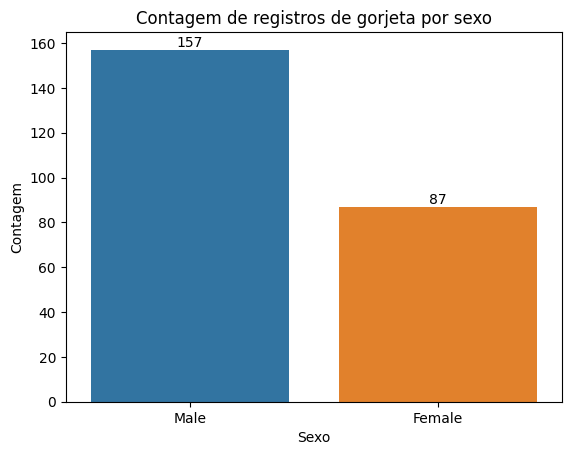

In [69]:
# Plota um gráfico de barras de contagem de registros de gorjetas por sexo
fig, ax = plt.subplots()
sns.countplot(data=tips, x='sex')

# Títulos
plt.title('Contagem de registros de gorjeta por sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')

# Insere o valor de cada barra
ax.bar_label(ax.containers[0])

plt.show()

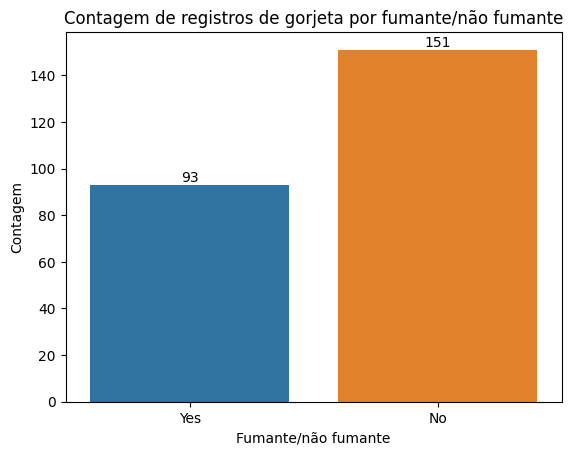

In [70]:
# Plota um gráfico de barras de contagem de registros de gorjetas por (não) fumante
fig, ax = plt.subplots()
sns.countplot(data=tips, x='smoker')

# Títulos
plt.title('Contagem de registros de gorjeta por fumante/não fumante')
plt.xlabel('Fumante/não fumante')
plt.ylabel('Contagem')

# Insere o valor de cada barra
ax.bar_label(ax.containers[0])

plt.show()

O maior número de gorjetas, independentemente do valor, foram dadas por homens e por não fumantes.